# Aula 8 - Agregação com Pandas, Ambiente de Desenvolvimento e Git

In [1]:
# Importe a biblioteca pandas
import pandas as pd
import numpy as np

### 8.1 Escreva uma função para ler os dados de PIB e população dos datasets disponibilizados e retornar um dataframe com a agregação por Estados e as métricas soma, média, desvio padrão e mediana do PIB de 2017 e da população de todos os Estados brasileiros.

In [14]:
def aggregate_pib_pop(path_pop, path_pib):
    """retorne um dataframe com a agregação por Estados e as métricas soma, média, mediana
       e o desvio padrão do PIB de 2017 e da população de todos os Estados brasileiros.
    """
    ### BEGIN SOLUTION
    df_pop = pd.read_excel(path_pop, sheet_name="Municipios", dtype={'cod_munic': str, 'cod_uf': str})
    # Concatena o codigo da UF com o codigo do municipio
    df_pop['cod_ibge7'] = df_pop['cod_uf'] + df_pop['cod_munic']
    df_pib = pd.read_excel(path_pib, skiprows=3, skipfooter=1, dtype={'Unnamed: 1': str})
    df_pib.rename(columns={'Unnamed: 0': 'nivel', 'Unnamed: 1': 'cod_ibge7', 
                           'Unnamed: 2': 'municipio'}, inplace=True)
    df_pib_pop = pd.merge(df_pop, df_pib, on='cod_ibge7')
    return df_pib_pop.groupby('uf').agg({'pop2017' : ['sum', 'mean', 'median', 'std'], '2017' : ['sum', 'mean', 'median', 'std']})
    ### END SOLUTION


In [15]:
## Faça seus testes aqui
path_pib = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/pib/pib_municipios.xlsx'
path_pop='https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/populacao/estimativa_dou_2017.xlsx'




In [16]:
# Validação
path_pib = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/pib/pib_municipios.xlsx'
path_pop='https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/populacao/estimativa_dou_2017.xlsx'

test_data = {('pop2017', 'sum'): 829619.0,
 ('pop2017', 'mean'): 37710.0,
 ('pop2017', 'median'): 17903.5,
 ('pop2017', 'std'): 79036.0,
 ('2017', 'sum'): 14271061.0,
 ('2017', 'mean'): 648684.6,
 ('2017', 'median'): 229775.0,
 ('2017', 'std'): 1695166.9}
results_ac = aggregate_pib_pop(path_pop, path_pib).loc['AC'].apply(lambda x: round(x,1))

assert results_ac.to_dict() == test_data

### 8.2 Escreva uma função para agregar o dataset do Titanic por classe (pclass) e sexo (sex) e calcular a soma da coluna survived (sobrevivente) e a média e mediana da coluna fare (preço do ticket).


In [11]:
# Dica: Faça a agregação usando um dicionário que mapeia a coluna e a(s) respectiva(s) métrica(s) de
#       agregação solicitada(s) no enunciado.
def agg_titanic(df_titanic):
    """retorne aagregação do dataframe df_titanic por pclass e sex e calcular a soma 
       da coluna survived e a média e mediana da coluna fare.
    """
    ### BEGIN SOLUTION
    return df_titanic.groupby(['pclass', 'sex']).agg({'survived': 'sum', 'fare': ['mean', 'median']})
    ### END SOLUTION


In [12]:
## Faça seus testes aqui
path_titanic = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/titanic/titanic.xls'



In [13]:
# Validação
path_titanic = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/titanic/titanic.xls'
test_data = {('survived', 'sum'): {(1, 'female'): 139,  (1, 'male'): 61,
  (2, 'female'): 94,  (2, 'male'): 25,  (3, 'female'): 106,  (3, 'male'): 75},
  ('fare', 'mean'): {(1, 'female'): 109.4,  (1, 'male'): 69.9,  (2, 'female'): 23.2,
  (2, 'male'): 19.9,  (3, 'female'): 15.3,  (3, 'male'): 12.4}, 
  ('fare', 'median'): {(1, 'female'): 80.9,  (1, 'male'): 49.5,  
  (2, 'female'): 23.0,  (2, 'male'): 13.0,  (3, 'female'): 10.5,  (3, 'male'): 7.9}}

df_titanic = pd.read_excel(path_titanic)
result_agg = agg_titanic(df_titanic).apply(lambda x: round(x, 1))

assert result_agg.to_dict() == test_data

### 8.3 Escreva uma função para realizar o agrupamento do dataset de morbidade por UF e por município aplicando a soma sobre as colunas Valor_total, Internações e Dias_permanência. Em seguida calcule, para todos os municípios nesta agregação, o custo médio diário das internações com a seguite fórmula: 
#### Dica: Faça a agregação usando um dicionário que mapeia a coluna e a respectiva métrica de agregação solicitada no enunciado.
#### Use a seguinte fórmula para calculár o custo diário médio de internação:
```python 
custo_medio_diario_intern = Valor_total/Dias_permanência
```

In [19]:
def custo_medio_internacao_agregado(df_morbidade_pop):
    ### BEGIN SOLUTION
    df_internacoes = df_morbidade_pop.groupby(['uf','municipio']).agg({'Valor_total': 'sum', 'Internações': 'sum', 'Dias_permanência': 'sum'})
    df_internacoes['custo_medio_diario_intern'] = df_internacoes['Valor_total']/df_internacoes['Dias_permanência']
    return df_internacoes
    ### END SOLUTION

In [17]:
# Faça seus testes aqui
path_morbidade = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/populacao/estimativa_dou_2017.xlsx'


In [27]:
# Validação
path_morbidade = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/populacao/estimativa_dou_2017.xlsx'

test_data = {'Valor_total': 1534117.3,
 'Internações': 1094.0,
 'Dias_permanência': 5291.0,
 'custo_medio_diario_intern': 289.9}

df_pop = pd.read_excel(path_pop, sheet_name="Municipios", dtype={'cod_munic': str, 'cod_uf': str})
df_pop['cod_ibge6'] = df_pop['cod_uf'] + df_pop['cod_munic'].apply(lambda x: x[:-1])
df_morbidade = pd.read_csv(path_morbidade, sep=';', decimal=',', dtype={'cod_ibge6': str}, 
                           na_values=['-', '...'])
df_pop_morbidade = pd.merge(df_pop, df_morbidade, on='cod_ibge6') 

data_abadia_go = custo_medio_internacao_agregado(df_pop_morbidade).loc['GO','Abadia de Goiás']
data_abadia_go = data_abadia_go.apply(lambda x: round(x, 1))
# data_abadia_go
assert data_abadia_go.to_dict() == test_data

### 8.4 Plote um gráfico boxplot da coluna Valor_total de 5 municípios do dataset de Morbidade do Datasus. Os municípios a serem plotados são aqueles que obtiveram o maior custo médio diário de internação em todo o brasil. 
#### Esta métrica de custo médio diário de internação foi calculada no exercício 8.3. Use um argumento aspect=2 para o gráfico não sobrepor os nomes das cidades.
#### Dica 1: Antes de tentar plotar o gráfico, escreva algumas sentenças de código usando operações do pandas para encontrar quais são esses 5 municípios.
#### Dica 2: Depois de encontrar o codigo IBGE desses 5 municípios, faça um filtro no dataframe dos dados de morbidade e plote o boxplot desses 5 municípios.

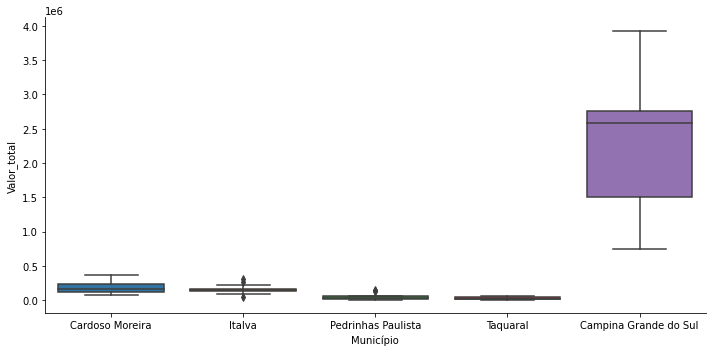

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
path_morbidade = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/populacao/estimativa_dou_2017.xlsx'

df_pop = pd.read_excel(path_pop, sheet_name="Municipios", dtype={'cod_munic': str, 'cod_uf': str})
# Concatena o codigo da UF com o codigo do municipio
df_pop['cod_ibge6'] = df_pop['cod_uf'] + df_pop['cod_munic'].apply(lambda x: x[:-1])
df_morbidade = pd.read_csv(path_morbidade, sep=';', decimal=',', dtype={'cod_ibge6': str}, 
                           na_values=['-', '...'])
df_pop_morb =  pd.merge(df_pop, df_morbidade, on='cod_ibge6')
grouped=df_pop_morb.groupby(['municipio', 'cod_ibge6'])
df_final = grouped.agg({'Valor_total':'sum','Internações':'sum','Dias_permanência':'sum'})
df_final['custo_medio_diario_intern'] = df_final['Valor_total']/df_final['Dias_permanência']
df_final.sort_values(by=['custo_medio_diario_intern'],ascending=False, inplace=True)
df_final = df_final.iloc[:5]
selecao = df_final.reset_index(level='cod_ibge6')['cod_ibge6']
df_selecao = df_pop_morb[df_pop_morb['cod_ibge6'].isin(selecao)]
sns.catplot(x="Município", y="Valor_total", data=df_selecao, kind="box", aspect=2)